In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
import chardet

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
with open("G:\sem2\aml\assignment1\spamfilter\SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
fs = pd.read_csv("G:\sem2\aml\assignment1\spamfilter\SMSSpamCollection",sep='\t',names=["v1","v2"],encoding=result['encoding'])

In [8]:
fs=fs[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [9]:
fs.head()
fs.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
fs.drop_duplicates(subset="sms",inplace=True)
fs.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,You still at the game?
freq,4516,1


In [11]:
sms = fs['sms']
label = fs['label']

In [12]:
def set_binary_labels(label):
    if label == 'spam':
        return 1
    else:
        return 0

In [13]:
from sklearn.model_selection import train_test_split
sms_train, sms_test, label_train, label_test = train_test_split(sms, label, random_state=16)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Vectorizer 

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)

# Logistic Regression

Logistic regression is a traditional statistics technique that is also very popular as a machine learning tool. 

Logistic regression is based on logistic distribution under which we assume that the dependent variable is dichotomous in nature. We use the logistic model to compute the probability of falling in any one of the classes.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression(random_state=42)
pipeline_logistic = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', logistic_regression)])

### Validation score

In [17]:
cv_score_regression = cross_val_score(pipeline_logistic, sms_train, label_train, cv=5)
print("The cross validation score for Logistic Regression is:")
print(cv_score_regression)

The cross validation score for Logistic Regression is:
[0.95618557 0.95876289 0.95225806 0.96645161 0.97416021]


### Precision Recall 

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1112
        spam       0.99      0.74      0.85       181

   micro avg       0.96      0.96      0.96      1293
   macro avg       0.98      0.87      0.91      1293
weighted avg       0.96      0.96      0.96      1293

The precision recall curve


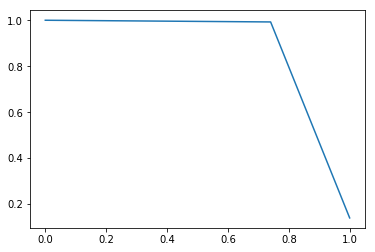

In [18]:
pipeline_logistic.fit(sms_train, label_train)
label_predicted = pipeline_logistic.predict(sms_test)


print(classification_report(label_test,label_predicted))

from sklearn.metrics import precision_recall_curve

label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
pipeline_forest = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', random_forest)])

### Cross Validation score

In [20]:
cv_score_random_forest = cross_val_score(pipeline_forest, sms_train, label_train, cv=5)
print("The cross validation score for Random Forest is:")
print(cv_score_random_forest)

The cross validation score for Random Forest is:
[0.95876289 0.97036082 0.95612903 0.96516129 0.96511628]


### Precision Recall 

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1112
        spam       0.99      0.73      0.84       181

   micro avg       0.96      0.96      0.96      1293
   macro avg       0.98      0.87      0.91      1293
weighted avg       0.96      0.96      0.96      1293

The precision recall curve is:


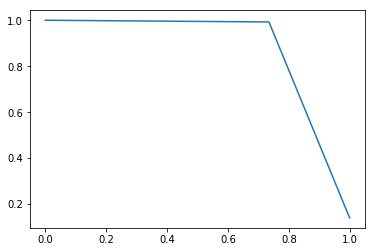

In [21]:
pipeline_forest.fit(sms_train, label_train)
label_predicted = pipeline_forest.predict(sms_test)

print(classification_report(label_test,label_predicted))

label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]


print("The precision recall curve is:")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', naive_bayes)])

### Cross Validation Score

In [23]:
cv_score_naive_bayes = cross_val_score(pipeline_bayes, sms_train, label_train, cv=5)
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
[0.94458763 0.94974227 0.93935484 0.94967742 0.94573643]


### Precision Recall 

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1112
        spam       1.00      0.62      0.77       181

   micro avg       0.95      0.95      0.95      1293
   macro avg       0.97      0.81      0.87      1293
weighted avg       0.95      0.95      0.94      1293

The precision recall curve


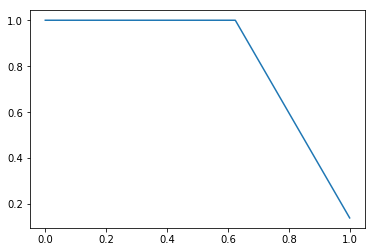

In [24]:
pipeline_bayes.fit(sms_train, label_train)
label_predicted = pipeline_bayes.predict(sms_test)

print(classification_report(label_test,label_predicted))

label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)